## Independent Alleles  

#### Problem  

[문제원본 링크](http://rosalind.info/problems/lia/)  


한 사건이 일어날 확률이 P()라 할 때, 주어진 사건 A와 B는 P(A and B) == P(A) x P(B)라는 공식이 성립한다는 가정하에 서로 독립적인 사건이다. 즉 이 사건들은 서로에게 영향을 미치지 않기 때문에 우리는 각각의 사건이 일어날 확률을 개별적으로 계산한 후 곱셈할 수 있다.  

더 나아간다면, 무작위 변수 X와 Y가 (사건이 일어났을 때 도출되는 변수) 각각의 사건 A, B와 관련되어 있다고 할 때 이들 변수는 서로 독립적이다.  

어떻게 독립적인 사건으로 확률을 계산할 수 있는지 예를 들기 위해, X와 Y가 두 주사위로부터 나온 숫자라고 생각해보자. 직관적으로, 하나의 주사위에서 보여지는 숫자는, 다른 주사위에서 보여지는 숫자에 영향을 끼치지 않는다. 만약 우리가 변수 X + Y가 홀수일 확률을 찾고 싶다면, 우리는 굳이 트리 다이어그램을 그리면서 모든 경우의 수를 고려할 필요가 없다.  

먼저 X + Y 가 홀수여야 함을 기록한다.  
> X가 짝수이고 Y가 홀수  

혹은

> X가 홀수이고 Y가 짝수  

확률로 나타내면 다음과 같다.
> P(X + Y is odd) = P(X is even and Y is odd) + P(X is odd and Y is even)  

확률 독립의 법칙을 사용하면 위 식은 다음과 같이 정리된다.  
> (P(X is even) x P(Y is odd)) + (P(X is odd) + P(Y is even))  

> (1/2)^2 + (1/2)^2 = 1/2  

**Given** : 두 개의 정수가 주어진다(*k* <= 7, *N*<= 2^k).  톰이라는 사람에서 시작하는데, 톰은 0세대이고, **AaBb** 의 유전자형을 가진다. 톰은 두 명의 자녀가 있다. 이들은 1세대이고, 이들도 각각 두 명의 자녀(2세대)가 있다. 세대가 이런식으로 이어진다고 가정하자. 각각의 개체는 언제나 AaBb의 유전자형을 가지는 개체와 교배한다.  

**Return** : 톰의 가족 트리에서, k 세대에 AaBb 개체가 최소 N개체 존재할 확률을 출력하면된다. 이때 멘델의 두 번째 법칙을 따른다고 가정하자.  

**Sample Dataset**  
> *k* = 2, *N* = 1  
  
**Sample Output**  
> 0.684  




이 문제를 풀려면, 먼저 경우의 수를 따져봐야 한다. 0세대 톰(AaBb)과 배우자(AaBb)를 교배하면, 1세대에서 나올 수 있는 자녀의 유전자형은 다음과 같다.
> AABB, AABb, AAbb, AaBB, AaBb, Aabb, aaBB,
  aaBb, aabb  

이 자녀와 배우자(AaBb)를 교배할 경우, 각 유전자 형 마다 2세대 자녀(AaBb)가 나올 확률은 어떠할까? 1/4로 모두 같다.

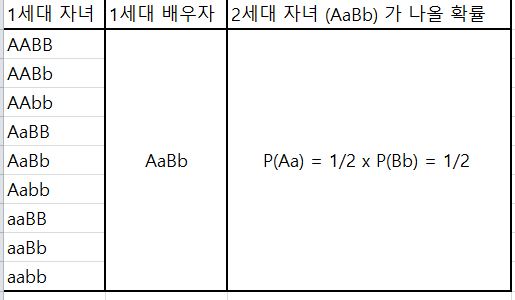

따라서 자녀들 마다 그 다음 자녀가 나올 확률을 일일이 신경쓸 필요가 없다.  
이에 관한 경우의 수가 아무리 많아져도 AaBb 자녀가 나올 확률은 1/4로 같기 때문이다. n세대 후 늘어나는 자녀의 수만 신경쓰면 될 것이다.  

> - 1 세대 자녀 수 : 2  
> - 2 세대 자녀 수 : 4  
> - 3 세대 자녀 수 : 8  
> - *N* 세대 자녀 수 : 2^*N*  

2세대 자녀들 중 최소 1 개체가 AaBb일 가능성을 따져보자. 2세대의 자녀들 수는 4이므로 다음과 같은 경우의 수가 나온다.  
O 기호가 AaBb 자녀라고 가정한다.  

**쉽게 계산하려면 1에서 AaBb 자녀가 하나도 나오지 않을 확률을 빼면 된다.**  
**AaBb 자녀가 나오지 않을 확률은 개체 당 3/4이고, 총 자녀 수는 4명이므로 확률은 다음과 같다.**  

> 1 - ((3/4)^4) = 1 - 0.316 = 0.684  






In [16]:
'''
작성자 : 김한빈
작성날짜 : 21.02.15
코드 설명 : Rosalind - Independent Alleles를 풀기위한 코드이다.
'''
import itertools

def com(N, k):
    return len(list(itertools.combinations(range(1, N), k)))

def probablity(N, k):
    prob = 0
    total = 2**N
    for a in range(k, total+1):
        prob += ((0.25 ** a) * (0.75 ** (total-a))) * com(total+1, a)
    return prob

N = 2
k = 1

print(probablity(N, k))

0.68359375


코드를 짜기야 짰다만... com() 함수에서 계산하는데 시간이 너무 오래걸린다. 이를 더 효율적으로 줄이기 위한 코드는 없을까? 경우의 수가 많아지면 많아질수록 이 코드는 아예 실행하기가 힘들 것이다. 알고리즘을 복잡하게 만들었던 원인은 itertools.combinations()함수 자체였다. 이 함수가 모든 가능한 경우의 수를 **출력**하게 만들기 때문에 중첩 식으로 시간복잡도가 늘어날 수 밖에 없다. 따라서 그냥 조합의 개수만 세주기로 했다.  

만약 카드 10 장이 있을 때, 총 2 장을 뽑아 나올 수 있는 경우의 수 (중복 허용 안됨)를 계산한다고 해보자. 이를 구하는 공식은 다음과 같다.  

> nCr = nPr / r!  

> 이때 nPr = n! / (n-r)! 이므로,  

> nCr = (n! / (n-r)!) / r! 이다.  

따라서 다음과 같이 알고리즘을 수정했다.

In [22]:
''' (2차 수정)
작성자 : 김한빈
작성날짜 : 21.02.15
코드 설명 : Rosalind - Independent Alleles를 풀기위한 코드이다.
'''
import math

def com(N, k):
    return (math.factorial(N) / math.factorial(N-k)) / math.factorial(k)  # 알고리즘 수정

def probablity(N, k):
    prob = 0
    total = 2**N
    for a in range(k, total+1):
        prob += ((0.25 ** a) * (0.75 ** (total-a))) * com(total, a)
    return prob

N = 5
k = 9

print(probablity(N, k))

0.40648834849733056


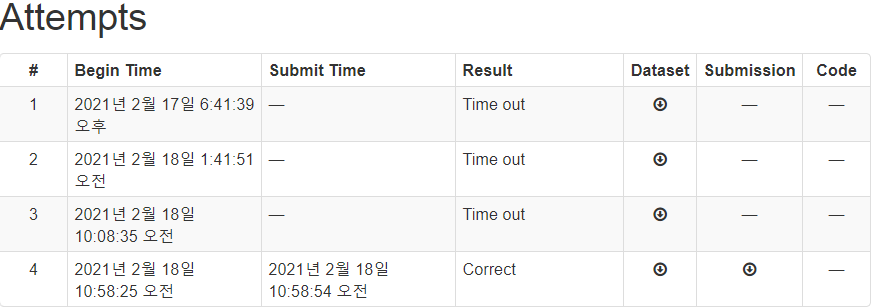